Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-Wage.csv")
df.head(5)


,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [2]:
df.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [3]:
len(df) #Total Instances/Samples

3000

In [4]:
df.isnull().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


There is no missing value in this dataset

**Handling categorical values or encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
df['maritl'] = le.fit_transform(df['maritl'])
df['race'] = le.fit_transform(df['race'])
df['education'] = le.fit_transform(df['education'])
df['region'] = le.fit_transform(df['region'])
df['jobclass'] = le.fit_transform(df['jobclass'])
df['health'] = le.fit_transform(df['health'])
df['health_ins'] = le.fit_transform(df['health_ins'])


In [8]:
df.head(10)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,0,0,0,0,0,0,1,4.318063,75.043154
1,2004,24,0,0,3,0,1,1,1,4.255273,70.476020
2,2003,45,1,0,2,0,0,0,0,4.875061,130.982177
3,2003,43,1,2,3,0,1,1,0,5.041393,154.685293
4,2005,50,3,0,1,0,1,0,0,4.318063,75.043154
5,2008,54,1,0,3,0,1,1,0,4.845098,127.115744
6,2009,44,1,3,2,0,0,1,0,5.133021,169.528538
7,2008,30,0,2,2,0,1,0,0,4.716003,111.720849
8,2006,41,0,1,2,0,1,1,0,4.778151,118.884359
9,2004,52,1,0,1,0,1,1,0,4.857332,128.680488


In [9]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
1956,2004,38,1,0,4,0,1,1,0,5.000000,148.413159
2286,2007,46,1,0,4,0,1,1,0,5.641006,281.745971
2733,2003,50,1,0,4,0,1,1,0,4.903090,134.705375


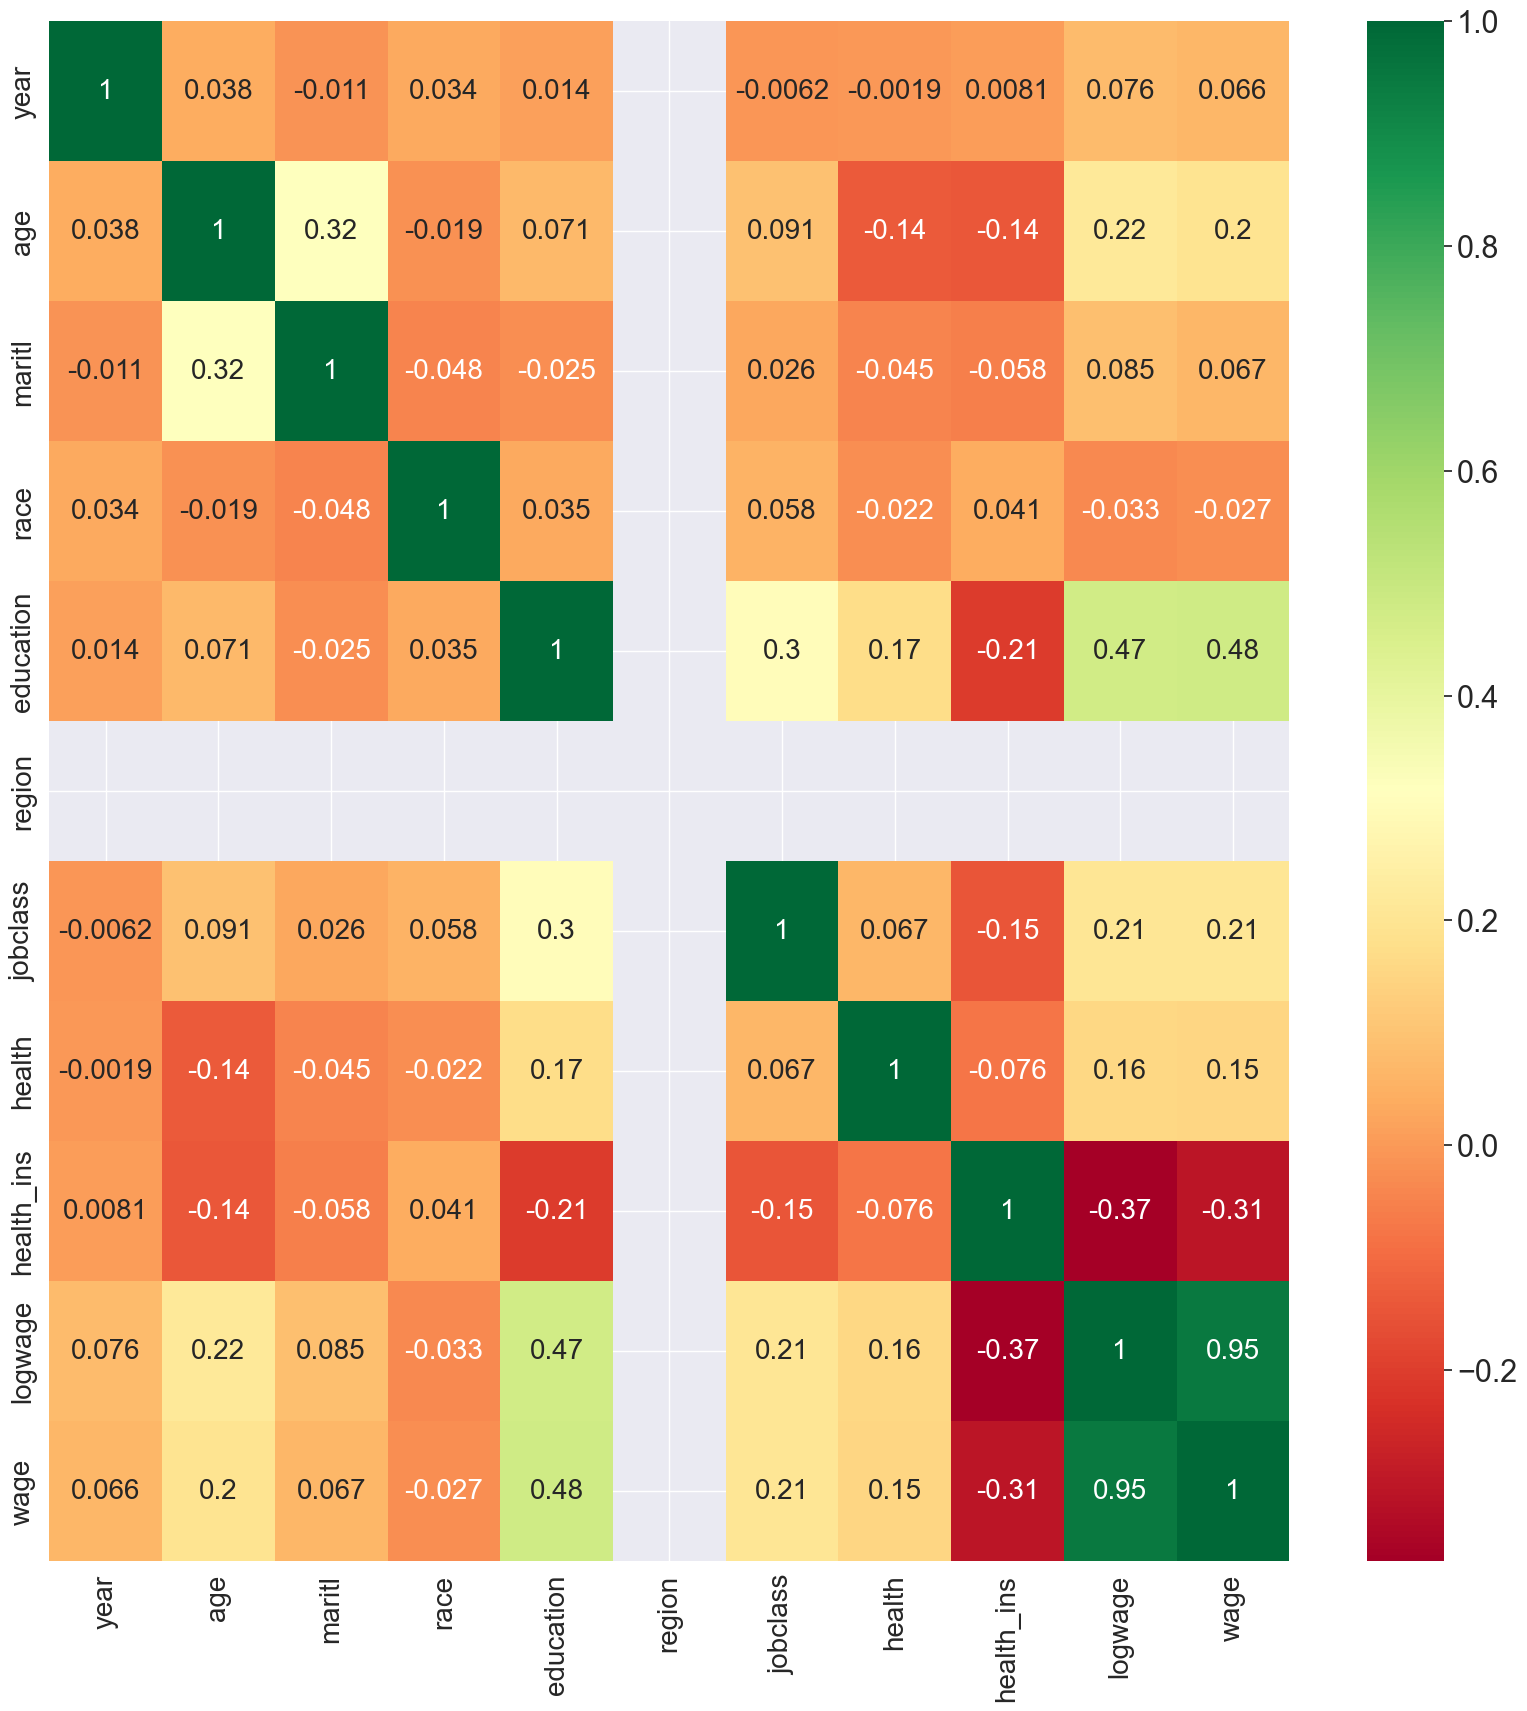

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

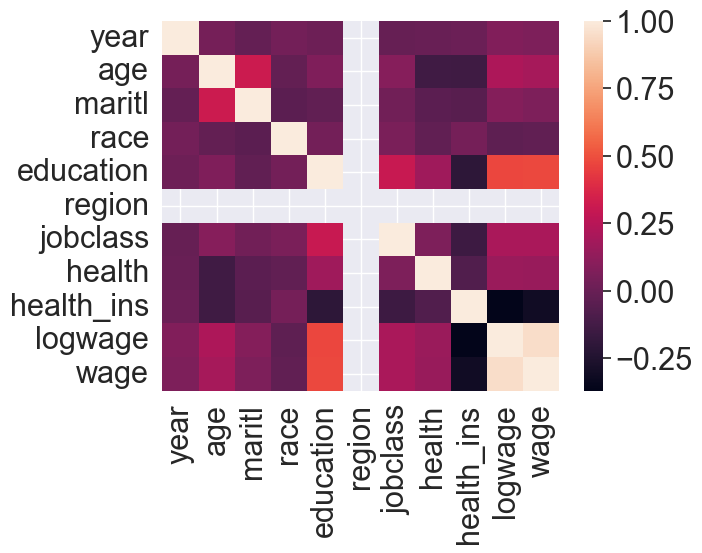

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop(columns=['wage', 'region'])
y = df['wage']

In [13]:
X

,year,age,maritl,race,education,jobclass,health,health_ins,logwage
0,2006,18,0,0,0,0,0,1,4.318063
1,2004,24,0,0,3,1,1,1,4.255273
2,2003,45,1,0,2,0,0,0,4.875061
3,2003,43,1,2,3,1,1,0,5.041393
4,2005,50,3,0,1,1,0,0,4.318063
...,...,...,...,...,...,...,...,...,...
2995,2008,44,1,0,2,0,1,0,5.041393
2996,2007,30,1,0,1,0,1,1,4.602060
2997,2005,27,1,1,0,0,0,1,4.193125
2998,2005,27,0,0,2,0,1,0,4.477121


In [14]:
y

0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64

In [15]:
total_samples = len(X)
train_samples = int(total_samples * 0.70)
valid_samples = int(total_samples * 0.15)

print("Train Samples: ", train_samples)
print("Valid Samples: ", valid_samples)


X_train, y_train = X[:train_samples], y[:train_samples]
X_valid, y_valid = X[train_samples:train_samples+valid_samples], y[train_samples:train_samples+valid_samples]
X_test, y_test = X[train_samples+valid_samples:], y[train_samples+valid_samples:]

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_valid))
print("Testing Size: ", len(X_test))

Train Samples:  2100
Valid Samples:  450
Total Samples:  3000
Training Size:  2100
Validation Size:  450
Testing Size:  450


# Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.fit_transform(X_valid) 
X_test = scaler.fit_transform(X_test)

In [17]:
X_test

array([[-1.34795228,  1.30725398,  0.01071021, ..., -1.55212464,
        -0.69301021, -0.42458387],
       [-1.34795228, -1.4761938 , -1.19418789, ..., -1.55212464,
         1.44298017, -0.5436202 ],
       [-0.37587131,  0.52440929,  0.01071021, ...,  0.64427815,
        -0.69301021,  0.45079789],
       ...,
       [-0.37587131, -1.30222832,  0.01071021, ..., -1.55212464,
         1.44298017, -1.29337069],
       [-0.37587131, -1.30222832, -1.19418789, ...,  0.64427815,
        -0.69301021, -0.50262555],
       [ 1.56829063,  1.1332885 ,  3.62540449, ..., -1.55212464,
        -0.69301021, -0.42458387]])

In [18]:
def calculate_mse(y, y_pred):
  mse = np.square(np.subtract(y, y_pred)).mean() 
  return mse


In [19]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
def evaluate_DecisionTree(maximum_depth, minimum_samples_split):
  model = DecisionTreeRegressor(max_depth=maximum_depth, min_samples_split=minimum_samples_split)
  model.fit(X_train, y_train)

  y_valid_predict = model.predict(X_valid)
  MSE_valid = calculate_mse(y_valid, y_valid_predict)
  y_test_predict = model.predict(X_test)
  MSE_test = calculate_mse(y_test, y_test_predict) 
  return MSE_valid, MSE_test 


best_mse = float("inf")
best_depth = None
best_min_samples = None
best_test = float("inf")
for depth in range(2, 200):  # Adjust the range as needed
  for min_samples in range(2, 200):  # Adjust the range as needed
    mse, mse_test = evaluate_DecisionTree(depth, min_samples)
    if mse < best_mse:
      best_mse = mse
      best_depth = depth
      best_test = mse_test  
      best_min_samples = min_samples

print(f"Best Hyperparameters: max_depth={best_depth}, min_samples_split={best_min_samples}")
print(f"Best Validation MSE: {best_mse}")


print(f"Mean Squared Error of Test Dataset: {best_test}")


Best Hyperparameters: max_depth=10, min_samples_split=23
Best Validation MSE: 14.955187986953494
Mean Squared Error of Test Dataset: 7.058118499892226
